In [1]:
import numpy as np

In [2]:
from classes.model import Model
from classes.scenario import Scenario


# Scenario overwrites default values
scenario = Scenario({
    "run_duration": 5,  # years
    "mt_hub_postcodes":['PL68DH', 'BS105NB']
})

model = Model(scenario)

model.run()

In [3]:
model.results_all

,id,lsoa,stroke_type,closest_ivt_unit,closest_ivt_duration,closest_mt_unit,closest_mt_duration,mt_transfer_unit,mt_transfer_duration,mt_transfer_required,...,thrombolysis,time_onset,time_ambulance_called,time_ambulance_arrives,time_ambulance_on_scene,time_unit_arrival,time_needle,time_transfer_unit_arrival,time_puncture,thrombectomy
0,1,Mendip 008D,1,BA13NG,39.1,BS105NB,49.8,BS105NB,33.7,False,...,False,0.0,30.0,60.0,80.0,119.1,NaN,NaN,NaN,False
1,2,South Somerset 020A,2,BA214AT,11.2,BS105NB,76.7,BS105NB,74.5,False,...,False,33.5,30.0,60.0,80.0,91.2,NaN,NaN,NaN,False
2,4,Gloucester 001D,1,GL13NN,9.0,BS105NB,45.5,BS105NB,46.6,False,...,False,179.2,30.0,60.0,80.0,89.0,NaN,NaN,NaN,False
3,3,Sedgemoor 014A,2,TA15DA,23.0,BS105NB,55.2,BS105NB,65.9,False,...,False,173.3,30.0,60.0,80.0,103.0,NaN,NaN,NaN,False
4,5,North Somerset 020C,3,BS234TQ,11.2,BS105NB,40.2,BS105NB,43.4,False,...,False,245.0,30.0,60.0,80.0,91.2,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,81,Torridge 002C,3,EX314JB,23.0,PL68DH,78.8,PL68DH,90.6,False,...,False,6879.1,30.0,60.0,80.0,103.0,NaN,NaN,NaN,False
81,82,West Oxfordshire 015B,1,SN36BB,28.4,OX39DU,33.7,BS105NB,49.8,True,...,False,6885.4,30.0,60.0,80.0,108.4,NaN,NaN,NaN,False
82,84,South Hams 002E,2,PL68DH,26.2,PL68DH,26.2,PL68DH,0.0,False,...,False,7046.5,30.0,60.0,80.0,106.2,NaN,NaN,NaN,False
83,83,Bath and North East Somerset 011B,1,BA13NG,11.2,BS105NB,31.6,BS105NB,33.7,False,...,True,7033.1,30.0,60.0,80.0,91.2,121.2,NaN,NaN,False


In [4]:
completed_patients_keys = model.pathway.completed_patients[0].keys()
time_cols = [x for x in completed_patients_keys if x[0:4] == 'time']
time_cols.remove('time_onset')

In [5]:
model.results_summary_all

,time_ambulance_called,time_ambulance_arrives,time_ambulance_on_scene,time_unit_arrival,time_needle,time_transfer_unit_arrival,time_puncture
statistic,,,,,,,
mean,30.0,60.0,80.0,102.115294,129.225000,NaN,91.2
std,0.0,0.0,0.0,10.388266,9.996465,NaN,NaN


In [6]:
model.results_summary_by_admitting_unit

time_ambulance_called      time_ambulance_arrives       \
                                  mean  std                   mean  std   
closest_ivt_unit                                                          
BA13NG                            30.0  0.0                   60.0  0.0   
BA214AT                           30.0  0.0                   60.0  0.0   
BS105NB                           30.0  0.0                   60.0  0.0   
BS234TQ                           30.0  0.0                   60.0  0.0   
EX25DW                            30.0  0.0                   60.0  0.0   
EX314JB                           30.0  0.0                   60.0  0.0   
GL13NN                            30.0  0.0                   60.0  0.0   
PL68DH                            30.0  0.0                   60.0  0.0   
SN36BB                            30.0  0.0                   60.0  0.0   
TA15DA                            30.0  0.0                   60.0  0.0   
TQ27AA                            30.0  0.0                   60.0  0.0   
TR13LQ                            30.0  0.0                   60.0  0.0   

                 time_ambulance_on_scene      time_unit_arrival             \
                                    mean  std              mean        std   
closest_ivt_unit                                                             
BA13NG                              80.0  0.0        106.612500  13.439966   
BA214AT                             80.0  0.0        101.662500   8.097255   
BS105NB                             80.0  0.0         96.000000   0.707107   
BS234TQ                             80.0  0.0        100.400000   7.278393   
EX25DW                              80.0  0.0        102.800000  12.280879   
EX314JB                             80.0  0.0         98.700000   8.418432   
GL13NN                              80.0  0.0        100.833333   9.051000   
PL68DH                              80.0  0.0         99.163636  11.163268   
SN36BB                              80.0  0.0         99.100000   7.636566   
TA15DA                              80.0  0.0        106.555556  13.133936   
TQ27AA                              80.0  0.0         94.750000   7.004784   
TR13LQ                              80.0  0.0        111.050000   9.127196   

                 time_needle            time_transfer_unit_arrival      \
                        mean        std                       mean std   
closest_ivt_unit                                                         
BA13NG            128.333333  15.302396                        NaN NaN   
BA214AT                  NaN        NaN                        NaN NaN   
BS105NB                  NaN        NaN                        NaN NaN   
BS234TQ                  NaN        NaN                        NaN NaN   
EX25DW            133.000000        NaN                        NaN NaN   
EX314JB                  NaN        NaN                        NaN NaN   
GL13NN            134.100000        NaN                        NaN NaN   
PL68DH            121.700000   2.262742                        NaN NaN   
SN36BB            122.200000        NaN                        NaN NaN   
TA15DA            133.333333  13.376970                        NaN NaN   
TQ27AA            133.000000        NaN                        NaN NaN   
TR13LQ                   NaN        NaN                        NaN NaN   

                 time_puncture      
                          mean std  
closest_ivt_unit                    
BA13NG                     NaN NaN  
BA214AT                    NaN NaN  
BS105NB                    NaN NaN  
BS234TQ                    NaN NaN  
EX25DW                     NaN NaN  
EX314JB                    NaN NaN  
GL13NN                     NaN NaN  
PL68DH                    91.2 NaN  
SN36BB                     NaN NaN  
TA15DA                     NaN NaN  
TQ27AA                     NaN NaN  
TR13LQ                     NaN NaN

In [7]:
model.results_all[np.isnan(model.results_all['time_puncture']) == False]

,id,lsoa,stroke_type,closest_ivt_unit,closest_ivt_duration,closest_mt_unit,closest_mt_duration,mt_transfer_unit,mt_transfer_duration,mt_transfer_required,...,thrombolysis,time_onset,time_ambulance_called,time_ambulance_arrives,time_ambulance_on_scene,time_unit_arrival,time_needle,time_transfer_unit_arrival,time_puncture,thrombectomy
75,76,Plymouth 008C,2,PL68DH,11.2,PL68DH,11.2,PL68DH,0.0,False,...,False,6754.2,30.0,60.0,80.0,91.2,NaN,NaN,91.2,True


In [8]:
model.results_all[np.isnan(model.results_all['time_needle']) == False]

,id,lsoa,stroke_type,closest_ivt_unit,closest_ivt_duration,closest_mt_unit,closest_mt_duration,mt_transfer_unit,mt_transfer_duration,mt_transfer_required,...,thrombolysis,time_onset,time_ambulance_called,time_ambulance_arrives,time_ambulance_on_scene,time_unit_arrival,time_needle,time_transfer_unit_arrival,time_puncture,thrombectomy
10,11,Bath and North East Somerset 005C,2,BA13NG,7.9,BS105NB,34.8,BS105NB,33.7,False,...,True,662.2,30.0,60.0,80.0,87.9,117.9,NaN,NaN,False
13,14,Taunton Deane 010B,2,TA15DA,7.9,BS105NB,61.6,BS105NB,65.9,False,...,True,960.6,30.0,60.0,80.0,87.9,117.9,NaN,NaN,False
27,28,West Somerset 003G,1,TA15DA,31.6,BS105NB,76.7,BS105NB,65.9,False,...,True,2400.8,30.0,60.0,80.0,111.6,141.6,NaN,NaN,False
29,30,Swindon 013D,1,SN36BB,12.2,OX39DU,48.8,BS105NB,49.8,True,...,True,2498.5,30.0,60.0,80.0,92.2,122.2,NaN,NaN,False
40,41,Forest of Dean 003D,1,GL13NN,24.1,BS105NB,58.4,BS105NB,46.6,False,...,True,3683.6,30.0,60.0,80.0,104.1,134.1,NaN,NaN,False
46,46,Mendip 001D,1,BA13NG,35.9,BS105NB,57.4,BS105NB,33.7,False,...,True,4476.4,30.0,60.0,80.0,115.9,145.9,NaN,NaN,False
49,50,Plymouth 003A,1,PL68DH,10.1,PL68DH,10.1,PL68DH,0.0,False,...,True,4749.6,30.0,60.0,80.0,90.1,120.1,NaN,NaN,False
59,60,Teignbridge 008A,1,TQ27AA,23.0,PL68DH,56.3,PL68DH,52.0,False,...,True,5568.2,30.0,60.0,80.0,103.0,133.0,NaN,NaN,False
67,68,South Somerset 022C,2,TA15DA,30.5,BS105NB,75.6,BS105NB,65.9,False,...,True,6211.9,30.0,60.0,80.0,110.5,140.5,NaN,NaN,False
74,75,East Devon 013A,1,EX25DW,23.0,PL68DH,65.9,PL68DH,59.5,False,...,True,6607.4,30.0,60.0,80.0,103.0,133.0,NaN,NaN,False


## Outcome model

In [23]:
import pandas as pd
import copy

In [13]:
# Imports from the stroke_outcome package:
from stroke_outcome.continuous_outcome import Continuous_outcome
import stroke_outcome.outcome_utilities as outcome_utilities

In [18]:
outcome_inputs_dict = {
    'stroke_type_code':model.results_all['stroke_type'],
    'stroke_type_code_on_input':model.results_all['stroke_type'],
    'onset_to_needle_mins':model.results_all['time_needle'],
    'ivt_chosen_bool':model.results_all['thrombolysis'],
    'onset_to_puncture_mins':model.results_all['time_puncture'],
    'mt_chosen_bool':model.results_all['thrombectomy']
}

outcome_inputs_df = pd.DataFrame(
    np.array(list(outcome_inputs_dict.values())).T,
    columns=list(outcome_inputs_dict.keys())
)

In [19]:
outcome_inputs_df

,stroke_type_code,stroke_type_code_on_input,onset_to_needle_mins,ivt_chosen_bool,onset_to_puncture_mins,mt_chosen_bool
0,1.0,1.0,NaN,0.0,NaN,0.0
1,2.0,2.0,NaN,0.0,NaN,0.0
2,1.0,1.0,NaN,0.0,NaN,0.0
3,2.0,2.0,NaN,0.0,NaN,0.0
4,3.0,3.0,NaN,0.0,NaN,0.0
...,...,...,...,...,...,...
80,3.0,3.0,NaN,0.0,NaN,0.0
81,1.0,1.0,NaN,0.0,NaN,0.0
82,2.0,2.0,NaN,0.0,NaN,0.0
83,1.0,1.0,121.2,1.0,NaN,0.0


In [20]:
continuous_outcome = Continuous_outcome()

In [21]:
continuous_outcome.assign_patients_to_trial(outcome_inputs_df)

In [24]:
# Calculate outcomes:
patient_data_dict, outcomes_by_stroke_type, full_cohort_outcomes = (
    continuous_outcome.calculate_outcomes())

# Make a copy of the results:
outcomes_by_stroke_type = copy.copy(outcomes_by_stroke_type)
full_cohort_outcomes = copy.copy(full_cohort_outcomes)

In [27]:
import matplotlib.pyplot as plt

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.,  5.,  0.,  0.,
         0.,  0.,  0.,  0.,  4.,  0., 45.]),
 array([-1.1055786 , -1.05029967, -0.99502074, -0.93974181, -0.88446288,
        -0.82918395, -0.77390502, -0.71862609, -0.66334716, -0.60806823,
        -0.5527893 , -0.49751037, -0.44223144, -0.38695251, -0.33167358,
        -0.27639465, -0.22111572, -0.16583679, -0.11055786, -0.05527893,
         0.        ]),
 <BarContainer object of 20 artists>)

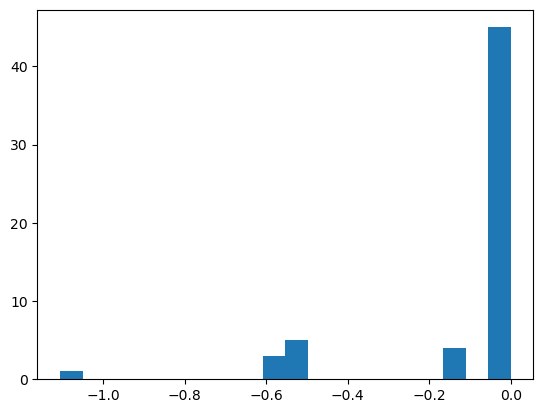

In [29]:
plt.hist(full_cohort_outcomes['each_patient_mrs_shift'], bins=20)
plt.show()

(array([45.,  0.,  2.,  2.,  0.,  0.,  0.,  0.,  2.,  6.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.        , 0.01069357, 0.02138714, 0.03208071, 0.04277428,
        0.05346784, 0.06416141, 0.07485498, 0.08554855, 0.09624212,
        0.10693569, 0.11762926, 0.12832283, 0.1390164 , 0.14970997,
        0.16040353, 0.1710971 , 0.18179067, 0.19248424, 0.20317781,
        0.21387138]),
 <BarContainer object of 20 artists>)

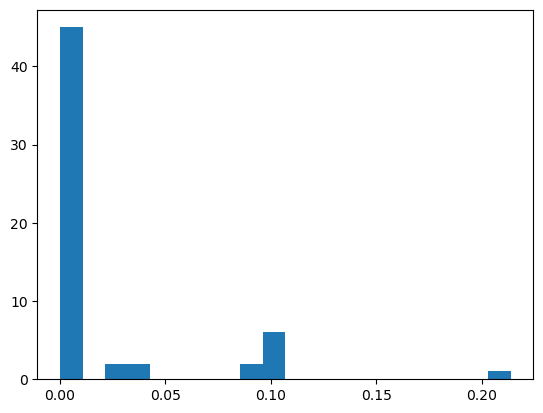

In [30]:
plt.hist(full_cohort_outcomes['each_patient_utility_shift'], bins=20)
plt.show()